In [10]:
import pandas as pd
from ggplot import *

# not sure if this is needed anymore
import matplotlib.pyplot as plt
%matplotlib inline

project_id = "the-d-team-164512"

Mercadis went out of patent in 2014 ... LINK please ... let's analyse the impact.

In [12]:
query = """\
SELECT
  DATE(t.Dispense_Week) AS dispense_week
  , COUNT(*) AS transaction_count
FROM [the-d-team-164512:dthon.transactions] t
JOIN [the-d-team-164512:dthon.drug_lookup] d
ON t.Drug_ID = d.MasterProductID
WHERE
    d.BrandName = 'MICARDIS'
    GROUP By Dispense_Week
ORDER BY transaction_count DESC
"""

df = pd.read_gbq(query, project_id)
df.dispense_week = pd.Series(df.dispense_week).apply(pd.to_datetime, format='%Y-%m-%d')
df.head(3)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 325 rows.

Total time taken 2.19 s.
Finished at 2017-04-22 18:40:37.


,dispense_week,transaction_count
0,2013-12-15,4338
1,2012-12-16,4310
2,2011-12-18,4185


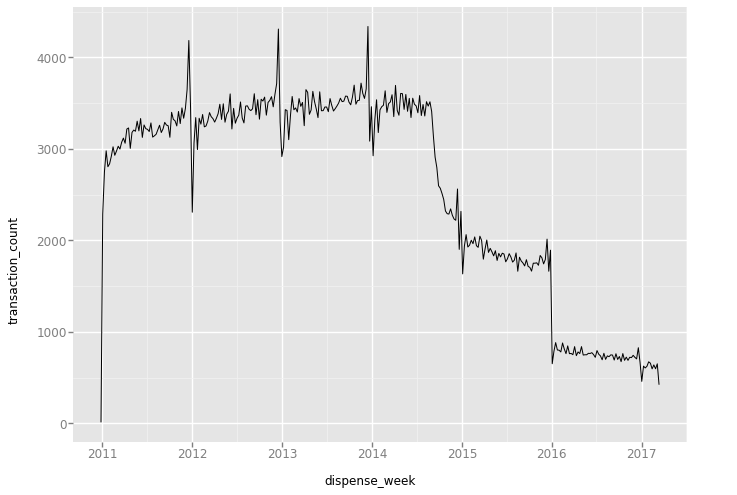

<ggplot: (115399352703)>

In [13]:
ggplot(aes(x='dispense_week', y='transaction_count'), data=df) + geom_line()